In [1]:
import os
os.chdir("D:/DLCgaming_v2/gamer-Dahlquist-2023-02-21/videos")

In [2]:
os.getcwd()

'D:\\DLCgaming_v2\\gamer-Dahlquist-2023-02-21\\videos'

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

In [5]:
df = pd.read_hdf("h265_crf12_20230208_GoPro_s4_T_0013DLC_resnet50_gamerFeb21shuffle1_100000.h5")

In [ ]:
df.to_csv('df.csv',index=False)

In [5]:
df = pd.read_csv("df.csv")

In [7]:
print(df)

         R.Wrist_x   R.Wrist_y   R.Elbow_x   R.Elbow_y  R.Shoulder_x  \
0       368.177490  213.269562  362.351227  224.992950    363.525818   
1       368.210175  213.302017  362.504394  225.054016    363.564880   
2       368.232117  213.322952  362.656250  224.988876    363.621490   
3       368.423706  213.286743  362.802429  225.070038    363.629456   
4       368.455353  213.233826  362.920563  225.156281    363.643372   
...            ...         ...         ...         ...           ...   
160179  313.603363  240.849472  335.876312  109.309883    416.304779   
160180  313.667664  240.799805  335.918823  109.343300    416.490631   
160181  313.700378  240.868637  335.960968  109.391518    416.264648   
160182  313.672302  240.910111  335.997192  109.426231    416.450928   
160183  313.664429  240.981644  336.010162  109.491981    416.372040   

        R.Shoulder_y  
0         221.662903  
1         221.624527  
2         221.587769  
3         221.604462  
4         221.561005

In [78]:
# calculate time interval
dt = 1/60.0

# calculate velocity of each body part
dx_wrist = np.gradient(df['R.Wrist_x'], dt)
dy_wrist = np.gradient(df['R.Wrist_y'], dt)
vx_wrist = 0.00833333 * np.sqrt(dx_wrist**2 + dy_wrist**2)  # convert to cm/sec

dx_elbow = np.gradient(df['R.Elbow_x'], dt)
dy_elbow = np.gradient(df['R.Elbow_y'], dt)
vx_elbow = 0.00833333 * np.sqrt(dx_elbow**2 + dy_elbow**2)  # convert to cm/sec

dx_shoulder = np.gradient(df['R.Shoulder_x'], dt)
dy_shoulder = np.gradient(df['R.Shoulder_y'], dt)
vx_shoulder = 0.00833333 * np.sqrt(dx_shoulder**2 + dy_shoulder**2)  # convert to cm/sec

# smooth the data
from scipy.signal import savgol_filter

window_length = 51
polyorder = 3

vx_wrist_smoothed = savgol_filter(vx_wrist, window_length=window_length, polyorder=polyorder)
vx_elbow_smoothed = savgol_filter(vx_elbow, window_length=window_length, polyorder=polyorder)
vx_shoulder_smoothed = savgol_filter(vx_shoulder, window_length=window_length, polyorder=polyorder)

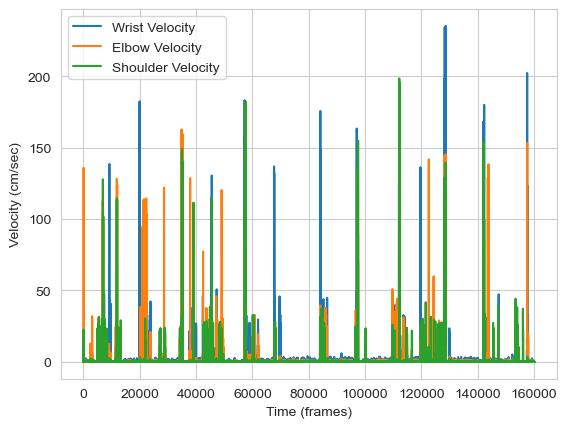

In [79]:
# create a new figure
fig, ax = plt.subplots()

# plot wrist velocity
ax.plot(df.index[1:-1], vx_wrist[1:-1], label='Wrist Velocity')

# plot elbow velocity
ax.plot(df.index[1:-1], vx_elbow[1:-1], label='Elbow Velocity')

# plot shoulder velocity
ax.plot(df.index[1:-1], vx_shoulder[1:-1], label='Shoulder Velocity')

# set axis labels and legend
ax.set_xlabel('Time (frames)')
ax.set_ylabel('Velocity (cm/sec)')
ax.legend()

# show the plot
plt.show()

In [80]:
# calculate the average velocity for each body part
avg_vx_wrist = np.mean(vx_wrist_smoothed)
avg_vx_elbow = np.mean(vx_elbow_smoothed)
avg_vx_shoulder = np.mean(vx_shoulder_smoothed)

print(f"Average wrist velocity: {avg_vx_wrist:.2f} cm/sec")
print(f"Average elbow velocity: {avg_vx_elbow:.2f} cm/sec")
print(f"Average shoulder velocity: {avg_vx_shoulder:.2f} cm/sec")

Average wrist velocity: 0.72 cm/sec
Average elbow velocity: 0.51 cm/sec
Average shoulder velocity: 0.39 cm/sec
